In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import os
os.getcwd()


'/content'

In [13]:
df = pd.read_csv('online_retail_II.csv' , encoding ="latin")

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [18]:
sample = df[["Customer ID", "Invoice", "Quantity", "Price"]].dropna()

In [19]:
sample.head()

,Customer ID,Invoice,Quantity,Price
0,13085.0,489434,12,6.95
1,13085.0,489434,12,6.75
2,13085.0,489434,12,6.75
3,13085.0,489434,48,2.10
4,13085.0,489434,24,1.25


In [33]:
customer_data = sample.groupby("Customer ID").agg(
    total_quantity=("Quantity", "sum"),
    avg_price=("Price", "mean"),
    num_transactions=("Invoice", "nunique")
)


In [34]:
customer_data.head()

,total_quantity,avg_price,num_transactions
Customer ID,,,
12346.0,52,12.573043,15
12347.0,509,1.834000,1
12348.0,373,0.719500,1
12349.0,988,8.406449,4
12352.0,77,2.075000,1


In [36]:
from sklearn.preprocessing import StandardScaler

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
customer_data = scaler.fit_transform(customer_data)

In [53]:
customer_data

array([[7.22595333e-03, 5.00696843e-04, 5.69105691e-02],
       [9.30677291e-03, 7.30354596e-05, 0.00000000e+00],
       [8.68753557e-03, 2.86526790e-05, 0.00000000e+00],
       ...,
       [7.64940239e-03, 3.32522403e-04, 0.00000000e+00],
       [9.68468981e-03, 1.74396480e-04, 8.13008130e-03],
       [1.26260672e-02, 8.83914343e-05, 1.21951220e-02]])

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
labels = kmeans.fit_predict(customer_data)

In [55]:
import numpy as np
np.bincount(labels)

array([3869,   15,  311])

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
customer_pca = pca.fit_transform(customer_data)

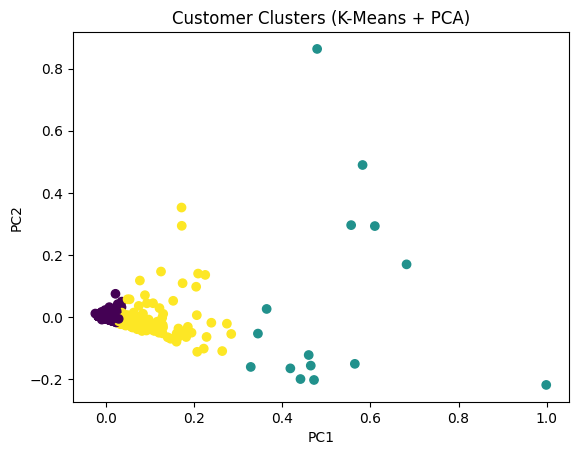

In [60]:
import matplotlib.pyplot as plt

plt.scatter(customer_pca[:, 0], customer_pca[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Clusters (K-Means + PCA)")
plt.show()